<a href="https://colab.research.google.com/github/longthanhta/CNN_miniprojects/blob/main/cat_dog_lenet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

# Load data, filtering only cat and dog

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print('training size:',len(train_labels),'testing size:',len(test_labels))

training size: 50000 testing size: 10000


In [ ]:
# Check number of data for each class
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


In [ ]:
inds_train = np.where((train_labels == 3) | (train_labels == 5))[0]
inds_test = np.where((test_labels == 3) | (test_labels == 5))[0]
'''
train_labels[train_labels == 3] = 1
train_labels[train_labels == 5] = 0
test_labels[test_labels == 3] = 1
test_labels[test_labels == 5] = 0
'''
train_images=train_images[inds_train]
train_labels=train_labels[inds_train]
test_images=test_images[inds_test]
test_labels=test_labels[inds_test]


# encode class values as integers
encoder = LabelEncoder()
encoder.fit(test_labels)
test_labels = encoder.transform(test_labels)
encoder.fit(train_labels)
train_labels = encoder.transform(train_labels)

print('training size:',len(train_images),'testing size:',len(test_images))




training size: 10000 testing size: 2000


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [ ]:
test_labels[0:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

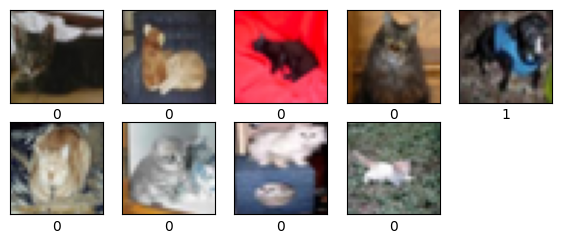

In [ ]:
plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:

# Define the input shape
input_shape = (32, 32, 3)

# Define the model architecture
model = tf.keras.models.Sequential([
    # Convolutional layer with 32 filters, each of size 3x3, and ReLU activation
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    # Max pooling layer with pool size of 2x2
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Convolutional layer with 64 filters, each of size 3x3, and ReLU activation
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer with pool size of 2x2
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Convolutional layer with 128 filters, each of size 3x3, and ReLU activation
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # Flatten the output of the convolutional layers
    tf.keras.layers.Flatten(),
    # Fully connected layer with 128 units and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),
    # Output layer with 2 units (one for each class) and softmax activation
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

fix by https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

In [ ]:
#model.compile(optimizer='adam',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#              loss=tf.keras.metrics.binary_crossentropy,
#              metrics=['accuracy'])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

Epoch 1/50


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 [==============================] - 11s 10ms/step - loss: 0.6700 - accuracy: 0.5780 - val_loss: 0.6413 - val_accuracy: 0.6380
Epoch 2/50
313/313 [==============================] - 3s 9ms/step - loss: 0.5992 - accuracy: 0.6768 - val_loss: 0.5558 - val_accuracy: 0.7125
Epoch 3/50
313/313 [==============================] - 3s 9ms/step - loss: 0.5483 - accuracy: 0.7177 - val_loss: 0.5308 - val_accuracy: 0.7245
Epoch 4/50
313/313 [==============================] - 3s 8ms/step - loss: 0.5174 - accuracy: 0.7396 - val_loss: 0.5164 - val_accuracy: 0.7450
Epoch 5/50
313/313 [==============================] - 2s 8ms/step - loss: 0.4772 - accuracy: 0.7680 - val_loss: 0.5469 - val_accuracy: 0.7270
Epoch 6/50
313/313 [==============================] - 1s 5ms/step - loss: 0.4478 - accuracy: 0.7853 - val_loss: 0.4774 - val_accuracy: 0.7695
Epoch 7/50
313/313 [==============================] - 1s 4ms/step - loss: 0.4017 - accuracy: 0.8143 - val_loss: 0.5027 - val_accuracy: 0.7540
Epoch 8/50
313/

63/63 - 0s - loss: 2.2594 - accuracy: 0.7565 - 257ms/epoch - 4ms/step


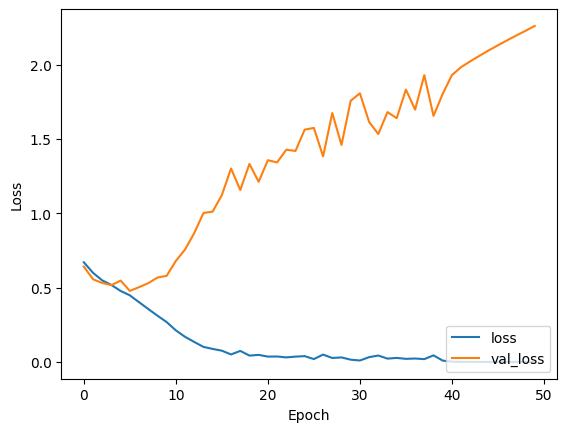

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
pred = model.predict(test_images)
pred[0]

63/63 [==============================] - 0s 3ms/step


array([1.000000e+00, 2.448319e-10], dtype=float32)

In [ ]:
# Convert predicted probabilities into class labels
pred_labels = np.argmax(pred, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(pred_labels, test_labels)

# Calculate F1 score for each class
f1_scores = f1_score(pred_labels, test_labels, average=None)

# Print results
print(conf_matrix)
print(f1_scores)

[[767 254]
 [233 746]]
[0.75903018 0.75391612]


<ipython-input-21-046aa20d06a7>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','CAT','DOG'])
<ipython-input-21-046aa20d06a7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['','DOG','CAT'])


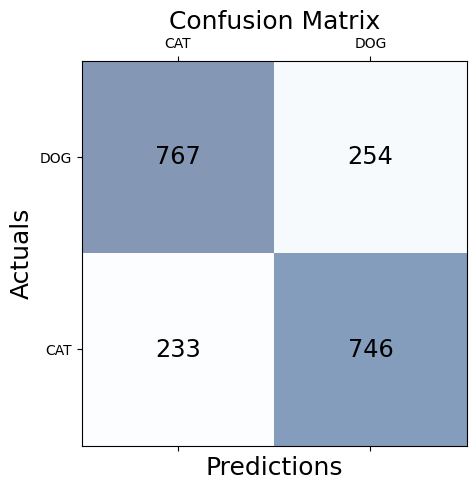

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
ax.set_xticklabels(['','CAT','DOG'])
ax.set_yticklabels(['','DOG','CAT'])
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
